In [1]:
import sys
sys.path.append("../src")
import matplotlib.pyplot as plt
import generate_general_networks as generate
import torch
import numpy as np
import tikzplotlib

### We investigate the smoothness of the bus delay in a 2x2 junction

In [2]:
# Create network and run simulation
T = 150
N = 3
speed_limits = [[torch.tensor(50.0)], [torch.tensor(50.0)], [torch.tensor(50.0)], [torch.tensor(50.0)]]
controls = [[], [], [], []]
cycle = [torch.tensor(60.0), torch.tensor(60.0)]

increment =  np.linspace(-30, 30, 13)

In [3]:
speed_objectives_1 = []
speed_objectives_2 = []
speed_objectives_3 = []
speed_objectives_4 = []
cycle_objectives_1 = []
cycle_objectives_2 = []
for inc in increment:
    speed_limits1 = [[torch.tensor(50.0 + inc)], [torch.tensor(50.0)], [torch.tensor(50.0)], [torch.tensor(50.0)]]
    speed_limits2 = [[torch.tensor(50.0)], [torch.tensor(50.0 + inc)], [torch.tensor(50.0)], [torch.tensor(50.0)]]
    speed_limits3 = [[torch.tensor(50.0)], [torch.tensor(50.0)], [torch.tensor(50.0 + inc)], [torch.tensor(50.0)]]
    speed_limits4 = [[torch.tensor(50.0)], [torch.tensor(50.0)], [torch.tensor(50.0)], [torch.tensor(50.0 + inc)]]

    cycle1 = [torch.tensor(60.0+inc), torch.tensor(60.0)]
    cycle2 = [torch.tensor(60.0), torch.tensor(60.0+inc)]

    speed_network_1 = generate.two_two_junction(T, N, speed_limits1, controls, cycle, track_grad=False)
    speed_network_2 = generate.two_two_junction(T, N, speed_limits2, controls, cycle, track_grad=False)
    speed_network_3 = generate.two_two_junction(T, N, speed_limits3, controls, cycle, track_grad=False)
    speed_network_4 = generate.two_two_junction(T, N, speed_limits4, controls, cycle, track_grad=False)
    cycle_network_1 = generate.two_two_junction(T, N, speed_limits, controls, cycle1, track_grad=False)
    cycle_network_2 = generate.two_two_junction(T, N, speed_limits, controls, cycle2, track_grad=False)

    _, _, _, speed_delays1, _ = speed_network_1.solve_cons_law_counting()
    _, _, _, speed_delays2, _ = speed_network_2.solve_cons_law_counting()
    _, _, _, speed_delays3, _ = speed_network_3.solve_cons_law_counting()
    _, _, _, speed_delays4, _ = speed_network_4.solve_cons_law_counting()
    _, _, _, cycle_delays1, _ = cycle_network_1.solve_cons_law_counting()
    _, _, _, cycle_delays2, _ = cycle_network_2.solve_cons_law_counting()

    speed_objectives_1.append(speed_delays1[0][0] + speed_delays1[1][0])
    speed_objectives_2.append(speed_delays2[0][0] + speed_delays2[1][0])
    speed_objectives_3.append(speed_delays3[0][0] + speed_delays3[1][0])
    speed_objectives_4.append(speed_delays4[0][0] + speed_delays4[1][0])
    cycle_objectives_1.append(cycle_delays1[0][0] + cycle_delays1[1][0])
    cycle_objectives_2.append(cycle_delays2[0][0] + cycle_delays2[1][0])


Bus bus_1 reached bus stop 0 at time 40.85714101791382, should wait for 29.57911413571202 seconds
Bus bus_2 reached bus stop 0 at time 99.82856965065002, should wait for 29.605928335205103 seconds
Bus bus_1 reached bus stop 0 at time 53.71428310871124, should wait for 29.900726277504234 seconds
Bus bus_2 reached bus stop 0 at time 99.82856965065002, should wait for 29.60592699680022 seconds
Bus bus_1 reached bus stop 0 at time 24.914284825325012, should wait for 29.997623782030413 seconds
Bus bus_2 reached bus stop 0 at time 115.2571531534195, should wait for 29.53598013933224 seconds
Bus bus_1 reached bus stop 0 at time 24.914284825325012, should wait for 29.99762399865523 seconds
Bus bus_2 reached bus stop 0 at time 128.08571410179138, should wait for 29.731007293569597 seconds
Bus bus_1 reached bus stop 0 at time 24.914284825325012, should wait for 29.997623761375756 seconds
Bus bus_2 reached bus stop 0 at time 69.82856965065002, should wait for 29.605825431499145 seconds
Bus bus_1 

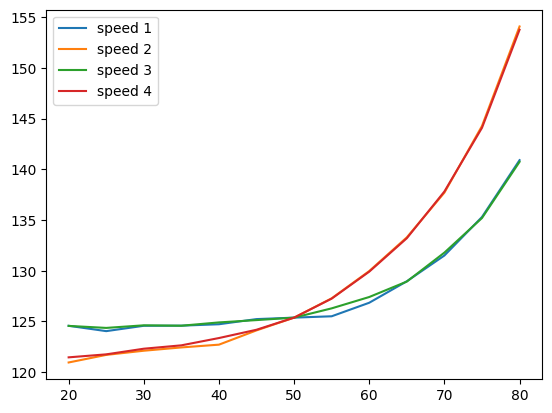

In [4]:
plt.plot(50-increment, speed_objectives_1, label="speed 1")
plt.plot(50-increment, speed_objectives_2, label="speed 2")
plt.plot(50-increment, speed_objectives_3, label="speed 3")
plt.plot(50-increment, speed_objectives_4, label="speed 4")
plt.legend()
plt.show()

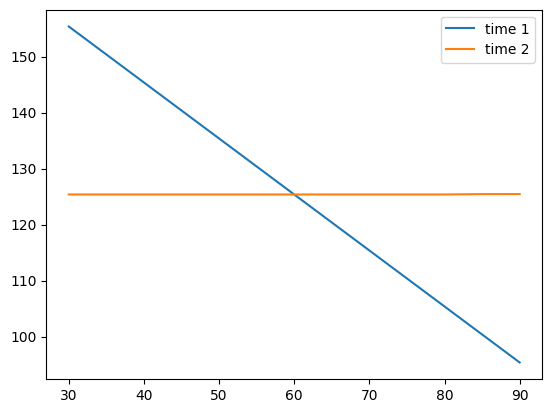

In [5]:
plt.plot(60-increment, cycle_objectives_1, label="time 1")
plt.plot(60-increment, cycle_objectives_2, label="time 2")
plt.legend()
plt.show()

#### Zooming In

In [6]:
# Create network and run simulation
T = 150
N = 3
speed_limits = [[torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)]]
controls = [[], [], [], []]
cycle = [torch.tensor(60.0), torch.tensor(60.0)]

increment_2 =  np.linspace(-10, 10, 21)

In [7]:
speed_objectives_1_zoomed = []
speed_objectives_2_zoomed = []
speed_objectives_3_zoomed = []
speed_objectives_4_zoomed = []
cycle_objectives_1_zoomed = []
cycle_objectives_2_zoomed = []
for inc in increment_2:
    speed_limits1 = [[torch.tensor(40.0 + inc)], [torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)]]
    speed_limits2 = [[torch.tensor(40.0)], [torch.tensor(40.0 + inc)], [torch.tensor(40.0)], [torch.tensor(40.0)]]
    speed_limits3 = [[torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0 + inc)], [torch.tensor(40.0)]]
    speed_limits4 = [[torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0 + inc)]]

    cycle1 = [torch.tensor(60.0+inc), torch.tensor(60.0)]
    cycle2 = [torch.tensor(60.0), torch.tensor(60.0+inc)]

    speed_network_1 = generate.two_two_junction(T, N, speed_limits1, controls, cycle, track_grad=False)
    speed_network_2 = generate.two_two_junction(T, N, speed_limits2, controls, cycle, track_grad=False)
    speed_network_3 = generate.two_two_junction(T, N, speed_limits3, controls, cycle, track_grad=False)
    speed_network_4 = generate.two_two_junction(T, N, speed_limits4, controls, cycle, track_grad=False)
    cycle_network_1 = generate.two_two_junction(T, N, speed_limits, controls, cycle1, track_grad=False)
    cycle_network_2 = generate.two_two_junction(T, N, speed_limits, controls, cycle2, track_grad=False)

    _, _, _, speed_delays1, _ = speed_network_1.solve_cons_law_counting()
    _, _, _, speed_delays2, _ = speed_network_2.solve_cons_law_counting()
    _, _, _, speed_delays3, _ = speed_network_3.solve_cons_law_counting()
    _, _, _, speed_delays4, _ = speed_network_4.solve_cons_law_counting()
    _, _, _, cycle_delays1, _ = cycle_network_1.solve_cons_law_counting()
    _, _, _, cycle_delays2, _ = cycle_network_2.solve_cons_law_counting()

    speed_objectives_1_zoomed.append(speed_delays1[0][0] + speed_delays1[1][0])
    speed_objectives_2_zoomed.append(speed_delays2[0][0] + speed_delays2[1][0])
    speed_objectives_3_zoomed.append(speed_delays3[0][0] + speed_delays3[1][0])
    speed_objectives_4_zoomed.append(speed_delays4[0][0] + speed_delays4[1][0])
    cycle_objectives_1_zoomed.append(cycle_delays1[0][0] + cycle_delays1[1][0])
    cycle_objectives_2_zoomed.append(cycle_delays2[0][0] + cycle_delays2[1][0])


Bus bus_1 reached bus stop 0 at time 33.78571397066116, should wait for 29.401180096902486 seconds
Bus bus_2 reached bus stop 0 at time 104.71428525447845, should wait for 29.5554073226165 seconds
Bus bus_1 reached bus stop 0 at time 37.642856776714325, should wait for 29.7135663696349 seconds
Bus bus_2 reached bus stop 0 at time 104.71428525447845, should wait for 29.55540749347885 seconds
Bus bus_1 reached bus stop 0 at time 29.928571164608, should wait for 29.707948541555947 seconds
Bus bus_2 reached bus stop 0 at time 107.9285774230957, should wait for 29.607640364423652 seconds
Bus bus_1 reached bus stop 0 at time 29.928571164608, should wait for 29.641287243504525 seconds
Bus bus_2 reached bus stop 0 at time 112.42857086658478, should wait for 29.69897726247972 seconds
Bus bus_1 reached bus stop 0 at time 29.928571164608, should wait for 29.707948541555947 seconds
Bus bus_2 reached bus stop 0 at time 94.71428525447845, should wait for 29.555394185612666 seconds
Bus bus_1 reached 

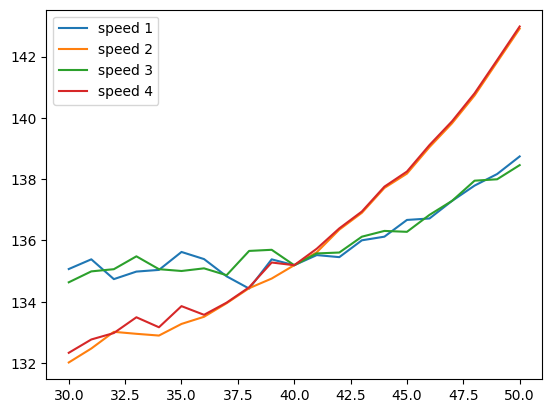

In [8]:
plt.plot(40-increment_2, speed_objectives_1_zoomed, label="speed 1")
plt.plot(40-increment_2, speed_objectives_2_zoomed, label="speed 2")
plt.plot(40-increment_2, speed_objectives_3_zoomed, label="speed 3")
plt.plot(40-increment_2, speed_objectives_4_zoomed, label="speed 4")
plt.legend()
plt.show()

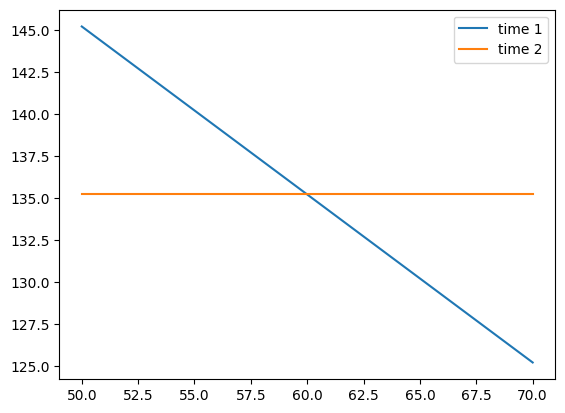

In [9]:
plt.plot(60-increment_2, cycle_objectives_1_zoomed, label="time 1")
plt.plot(60-increment_2, cycle_objectives_2_zoomed, label="time 2")
plt.legend()
plt.show()

#### Final zoom

In [10]:
# Create network and run simulation
T = 150
N = 3
speed_limits = [[torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)]]
controls = [[], [], [], []]
cycle = [torch.tensor(60.0), torch.tensor(60.0)]

increment_3 =  np.linspace(-1, 1, 11)

In [11]:
speed_objectives_1_zoomed_2 = []
speed_objectives_2_zoomed_2 = []
speed_objectives_3_zoomed_2 = []
speed_objectives_4_zoomed_2 = []
cycle_objectives_1_zoomed_2 = []
cycle_objectives_2_zoomed_2 = []
for inc in increment_3:
    speed_limits1 = [[torch.tensor(40.0 + inc)], [torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)]]
    speed_limits2 = [[torch.tensor(40.0)], [torch.tensor(40.0 + inc)], [torch.tensor(40.0)], [torch.tensor(40.0)]]
    speed_limits3 = [[torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0 + inc)], [torch.tensor(50.0)]]
    speed_limits4 = [[torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0)], [torch.tensor(40.0 + inc)]]

    cycle1 = [torch.tensor(60.0+inc), torch.tensor(60.0)]
    cycle2 = [torch.tensor(60.0), torch.tensor(60.0+inc)]

    speed_network_1 = generate.two_two_junction(T, N, speed_limits1, controls, cycle, track_grad=False)
    speed_network_2 = generate.two_two_junction(T, N, speed_limits2, controls, cycle, track_grad=False)
    speed_network_3 = generate.two_two_junction(T, N, speed_limits3, controls, cycle, track_grad=False)
    speed_network_4 = generate.two_two_junction(T, N, speed_limits4, controls, cycle, track_grad=False)
    cycle_network_1 = generate.two_two_junction(T, N, speed_limits, controls, cycle1, track_grad=False)
    cycle_network_2 = generate.two_two_junction(T, N, speed_limits, controls, cycle2, track_grad=False)

    _, _, _, speed_delays1, _ = speed_network_1.solve_cons_law_counting()
    _, _, _, speed_delays2, _ = speed_network_2.solve_cons_law_counting()
    _, _, _, speed_delays3, _ = speed_network_3.solve_cons_law_counting()
    _, _, _, speed_delays4, _ = speed_network_4.solve_cons_law_counting()
    _, _, _, cycle_delays1, _ = cycle_network_1.solve_cons_law_counting()
    _, _, _, cycle_delays2, _ = cycle_network_2.solve_cons_law_counting()

    speed_objectives_1_zoomed_2.append(speed_delays1[0][0] + speed_delays1[1][0])
    speed_objectives_2_zoomed_2.append(speed_delays2[0][0] + speed_delays2[1][0])
    speed_objectives_3_zoomed_2.append(speed_delays3[0][0] + speed_delays3[1][0])
    speed_objectives_4_zoomed_2.append(speed_delays4[0][0] + speed_delays4[1][0])
    cycle_objectives_1_zoomed_2.append(cycle_delays1[0][0] + cycle_delays1[1][0])
    cycle_objectives_2_zoomed_2.append(cycle_delays2[0][0] + cycle_delays2[1][0])

Bus bus_1 reached bus stop 0 at time 30.571428298950195, should wait for 29.395183034977165 seconds
Bus bus_2 reached bus stop 0 at time 104.71428525447845, should wait for 29.555407425507664 seconds
Bus bus_1 reached bus stop 0 at time 30.571428298950195, should wait for 29.487785220989263 seconds
Bus bus_2 reached bus stop 0 at time 104.71428525447845, should wait for 29.55540749347885 seconds
Bus bus_1 reached bus stop 0 at time 30.057141661643982, should wait for 29.597569995891238 seconds
Bus bus_2 reached bus stop 0 at time 102.09677851200104, should wait for 29.8270376852807 seconds
Bus bus_1 reached bus stop 0 at time 29.928571164608, should wait for 29.702920979422593 seconds
Bus bus_2 reached bus stop 0 at time 105.35714238882065, should wait for 29.455944471412757 seconds
Bus bus_1 reached bus stop 0 at time 29.928571164608, should wait for 29.707948541555947 seconds
Bus bus_2 reached bus stop 0 at time 103.71428525447845, should wait for 29.555405994298887 seconds
Bus bus_1

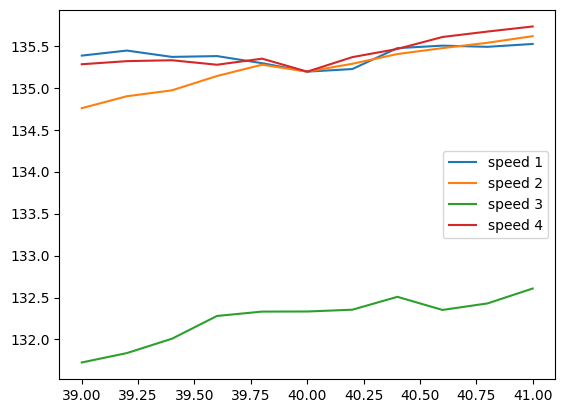

In [12]:
plt.plot(40-increment_3, speed_objectives_1_zoomed_2, label="speed 1")
plt.plot(40-increment_3, speed_objectives_2_zoomed_2, label="speed 2")
plt.plot(40-increment_3, speed_objectives_3_zoomed_2, label="speed 3")
plt.plot(40-increment_3, speed_objectives_4_zoomed_2, label="speed 4")
plt.legend()
plt.show()

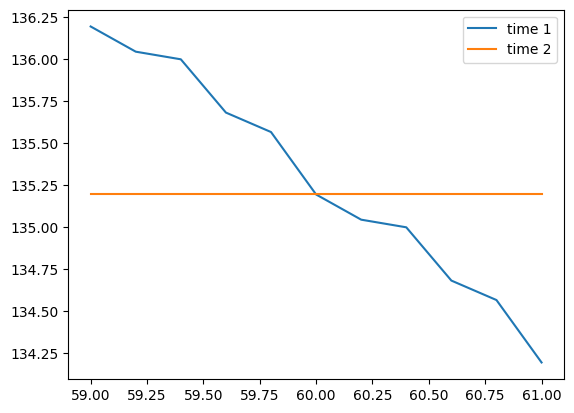

In [13]:
plt.plot(60-increment_3, cycle_objectives_1_zoomed_2, label="time 1")
plt.plot(60-increment_3, cycle_objectives_2_zoomed_2, label="time 2")
plt.legend()
plt.show()